## HiCouncellor: Google Play Store Apps analysis and Visualization

### Task 1 : Pre-processing the data for Ratings and Reviews

In [245]:
#Importing the required libraries

import pandas as pd
import numpy as np
from numpy import nan
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [263]:
#importing the data sets rating and reviews and making App index column
ratings=pd.read_csv("playstore_apps.csv", index_col='App')
reviews= pd.read_csv("playstore_reviews.csv", index_col='App')

### Pre-processing of the ratings dataset

In [264]:
#Shape of ratings 
ratings.shape

#Data contains 10841 rows and 12 columns

(10841, 12)

In [265]:
#looking at the data in both the data set-ratings
ratings.info()

#Rating,Current ver, Android Ver have the data type Object and we can see they also have missing values
#We can remove the columns containing irrelevant values

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10840 non-null  float64
 3   Size            10841 non-null  object 
 4   Installs        10840 non-null  float64
 5   Type            10840 non-null  object 
 6   Price           10840 non-null  float64
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.1+ MB


In [266]:
#Display the first 5 columns
ratings.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,07-01-2018,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,15-01-2018,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,01-08-2018,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,08-06-2018,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-06-2018,1.1,4.4 and up


## Subtask 1 : Removing Duplicate Rows


In [267]:
#Check for duplicate values in the DF
ratings.duplicated().value_counts()

#We have 492 ducplicate rows, lets drop the duplicate rows first.

False    10349
True       492
dtype: int64

In [268]:
#Dropping duplicate rows
ratings.drop_duplicates(keep='first', inplace=True)

#Lets check if duplicates were dropped
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10349 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10349 non-null  object 
 1   Rating          8891 non-null   float64
 2   Reviews         10348 non-null  float64
 3   Size            10349 non-null  object 
 4   Installs        10348 non-null  float64
 5   Type            10348 non-null  object 
 6   Price           10348 non-null  float64
 7   Content Rating  10348 non-null  object 
 8   Genres          10349 non-null  object 
 9   Last Updated    10348 non-null  object 
 10  Current Ver     10341 non-null  object 
 11  Android Ver     10346 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.0+ MB


## SubTask 2: Remove Irrelevant values from each column if any

In [269]:
#In order to remove irrelevant values from each column
#we need to check the unique attributes for each column to see if there are any irregularities.
print(ratings['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [270]:
#There is 1 column that is numerical '1.9', this does not make sense, 
#lets look at the data with these values understand it further
ratings[ratings['Category']=='1.9']

##It has all only 1 row and the values for most of it is null and thus we can drop this row

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",NaN,0,NaN,NaN,"February 11, 2018",NaN,4.0 and up,NaN


In [271]:
ratings.drop(ratings[ratings["Category"] == '1.9'].index[0], inplace=True)

#Lets check the row is dropped
print(ratings['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [272]:
#Repeat the steps for rating Column
ratings['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [273]:
##Rating is a numerical column thus we can fill Nan with 0
ratings['Rating'] = ratings['Rating'].fillna(0)

#Check again for values
print(ratings['Rating'].unique())

[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  0.  4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2]


In [274]:
#check for Reviews column
print(ratings['Reviews'].unique())

ratings['Reviews'].isna().any()

[1.59000e+02 9.67000e+02 8.75100e+04 ... 6.03000e+02 1.19500e+03
 3.98307e+05]


False

In [275]:
#check for Size column
print(ratings['Size'].unique())

ratings['Size'].isna().any()

#No null values

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M' '556k' '526k' '76M' '7.6M'

False

In [276]:
#check for installs column
print(ratings['Installs'].unique())
ratings['Installs'].isna().any()

## No null values

[1.e+04 5.e+05 5.e+06 5.e+07 1.e+05 5.e+04 1.e+06 1.e+07 5.e+03 1.e+08
 1.e+09 1.e+03 5.e+08 5.e+01 1.e+02 5.e+02 1.e+01 1.e+00 5.e+00 0.e+00]


False

In [277]:
#Check for column Type
print(ratings['Type'].unique())

# Drop rows with missing values in `Type` column
ratings.dropna(subset=['Type'], inplace=True)

#check once again after dropping Nan values
print(ratings['Type'].unique())

['Free' 'Paid' nan]
['Free' 'Paid']


In [280]:
#check for null values for Price column
print(ratings['Price'].unique())

print(ratings['Price'].isna().sum())


#No null values

[  0.     4.99   3.99   6.99   1.49   2.99   7.99   5.99   3.49   1.99
   9.99   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99
  14.99   1.    29.99  12.99   2.49  10.99   1.5   19.99  15.99  33.99
  74.99  39.99   3.95   4.49   1.7    8.99   2.     3.88  25.99 399.99
  17.99 400.     3.02   1.76   4.84   4.77   1.61   2.5    1.59   6.49
   1.29   5.    13.99 299.99 379.99  37.99  18.99 389.99  19.9    8.49
   1.75  14.     4.85  46.99 109.99 154.99   3.08   2.59   4.8    1.96
  19.4    3.9    4.59  15.46   3.04   4.29   2.6    3.28   4.6   28.99
   2.95   2.9    1.97 200.    89.99   2.56  30.99   3.61 394.99   1.26
   1.2    1.04]
0


In [282]:
#Repeat steps for column Content rating
print(ratings['Content Rating'].unique())
print(ratings['Content Rating'].isna().sum())

#No null values

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
0


In [283]:
#heck for Column Genres
print(ratings['Genres'].unique())
print(ratings['Genres'].isna().sum()) 
# We dont have no null values

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle

In [284]:
#check for column Last Updated column, lets first check the data type
print(ratings['Last Updated'].dtypes)
print(ratings['Last Updated'].unique())
#There are no null values

object
['07-01-2018' '15-01-2018' '01-08-2018' ... '20-01-2014' '16-02-2014'
 '23-03-2014']


In [285]:
# Check the `Current Ver` column for null values
print(apps['Current Ver'].isna().value_counts())

print(ratings['Current Ver'].unique())

ratings.dropna(subset=['Current Ver'], inplace=True)

False    10833
True         8
Name: Current Ver, dtype: int64
['1.0.0' '2.0.0' '1.2.4' ... '1.0.612928' '0.3.4' '2.0.148.0']


In [286]:
print(ratings['Current Ver'].isna().value_counts())

False    10339
Name: Current Ver, dtype: int64


In [287]:
 #Check the `Android Ver` column for null values
print(apps['Android Ver'].isna().value_counts())

print(ratings['Android Ver'].unique())

ratings.dropna(subset=['Android Ver'], inplace=True)

False    10838
True         3
Name: Android Ver, dtype: int64
['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1' nan
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']


In [288]:
print(ratings['Android Ver'].isna().value_counts())

False    10337
Name: Android Ver, dtype: int64


In [289]:
#CHeck once again the data, after making the changes
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10337 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10337 non-null  object 
 1   Rating          10337 non-null  float64
 2   Reviews         10337 non-null  float64
 3   Size            10337 non-null  object 
 4   Installs        10337 non-null  float64
 5   Type            10337 non-null  object 
 6   Price           10337 non-null  float64
 7   Content Rating  10337 non-null  object 
 8   Genres          10337 non-null  object 
 9   Last Updated    10337 non-null  object 
 10  Current Ver     10337 non-null  object 
 11  Android Ver     10337 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.0+ MB


### Pre-processing of the review dataset

In [290]:
# Lets check the shape of the DF reviews dimensions
reviews.shape

(64295, 4)

In [291]:
#Lets check the columns and there data types
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64295 entries, 10 Best Foods for You to Houzz Interior Design Ideas
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Translated_Review       37427 non-null  object 
 1   Sentiment               37432 non-null  object 
 2   Sentiment_Polarity      37432 non-null  float64
 3   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.5+ MB


In [293]:
#Lets check the first 20 records
reviews.head(20)

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
10 Best Foods for You,NaN,NaN,NaN,NaN
10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
10 Best Foods for You,Best way,Positive,1.000000,0.300000
10 Best Foods for You,Amazing,Positive,0.600000,0.900000
10 Best Foods for You,NaN,NaN,NaN,NaN
10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000


### Subtask 1 : Removing Duplicate Rows

In [294]:
# Drop all missing values in the reviews dataaset
reviews.dropna(inplace=True)

In [295]:
#check for duplicated values
reviews.duplicated().value_counts()

False    27994
True      9433
dtype: int64

In [296]:
# dropping duplicates
reviews.drop_duplicates(keep='first', inplace=True)

In [297]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27994 entries, 10 Best Foods for You to Housing-Real Estate & Property
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Translated_Review       27994 non-null  object 
 1   Sentiment               27994 non-null  object 
 2   Sentiment_Polarity      27994 non-null  float64
 3   Sentiment_Subjectivity  27994 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.1+ MB


In [298]:
#Check for the iirrelevant data
print(reviews.Translated_Review.unique())

reviews.Translated_Review.describe()

['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'
 'This help eating healthy exercise regular basis'
 'Works great especially going grocery store' ...
 'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.'
 'I property business got link SMS happy performance still guys need raise bar guys Cheers'
 'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active']


count                                                 27994
unique                                                27994
top       I like eat delicious food. That's I'm cooking ...
freq                                                      1
Name: Translated_Review, dtype: object

In [299]:
reviews.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [300]:
reviews.Sentiment_Polarity.unique()

array([ 1.        ,  0.25      ,  0.4       , ..., -0.52857143,
       -0.37777778,  0.17333333])

In [301]:
reviews.Sentiment.describe()

count        27994
unique           3
top       Positive
freq         17593
Name: Sentiment, dtype: object

/Users/pallavihunswadkar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


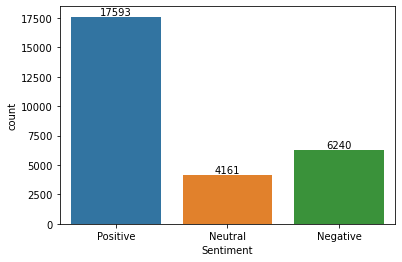

In [302]:
graph = sns.countplot(reviews.Sentiment);
for p in graph.containers:
    graph.bar_label(p)

In [303]:
#check for column Sentiment_Polarity
print(reviews.Sentiment_Polarity.unique())

reviews.Sentiment_Polarity.describe()

[ 1.          0.25        0.4        ... -0.52857143 -0.37777778
  0.17333333]


count    27994.000000
mean         0.169990
std          0.344385
min         -1.000000
25%          0.000000
50%          0.140000
75%          0.400000
max          1.000000
Name: Sentiment_Polarity, dtype: float64

In [304]:
#check for column Sentiment_Subjectivity
print(reviews.Sentiment_Subjectivity.unique())

reviews.Sentiment_Subjectivity.describe()

[0.53333333 0.28846154 0.875      ... 0.51145833 0.7172619  0.2594697 ]


count    27994.000000
mean         0.483735
std          0.261186
min          0.000000
25%          0.346154
50%          0.501591
75%          0.650000
max          1.000000
Name: Sentiment_Subjectivity, dtype: float64

In [305]:
#We will now be export as a csv file for further analysis
ratings.to_csv('cleaned_apps_ratings_GPS.csv', encoding = 'utf=8')
reviews.to_csv('cleaned_apps_reviews_GPS.csv', encoding = 'utf=8')

## END